In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn.objects as so


In [2]:
#!pip install --upgrade matplotlib

# Zip Recruiter National Data

In [3]:
#load national distribution for DS, DE, DA, and BA
zr_nat = pd.read_csv("data/ziprecruiter_data_national.csv")
zr_nat.head(5)

,role,top_earners,75th_percentile,average,25th_percentile
0,Data Scientist,197000,136000,127128,104000
1,Data Engineer,163500,139500,128704,111500
2,Data Analyst,123500,97500,80429,58000
3,Business Analyst,130000,120000,95472,71000


# Zip Recruiter State Data

In [4]:
#load average state level pay for DS, DE, DA, and BA
zr_st = pd.read_csv("data/ziprecruiter_data_by_state.csv")
zr_st.head(35)

,State,Data Scientist,Data Engineer,Data Analyst,Business Analyst
0,Alabama,103437,96843,69689,74375
1,Alaska,121680,141854,79092,89739
2,Arizona,122400,114596,82463,88010
3,Arkansas,96232,109017,62193,71249
4,California,143099,128004,75874,100388
5,Colorado,110256,124464,71206,81671
6,Connecticut,117597,114164,77036,86262
7,Delaware,110729,123888,71386,99863
8,Florida,103328,96743,69613,74298
9,Georgia,120321,112652,81062,86516


# BLS Data

In [5]:
#Get data scientist data
ds_df = pd.read_excel('data/OES_Report_data_scientists_by_state.xlsx', skiprows=5)
ds_df = ds_df.iloc[:-8]

#Subset columns and rename
ds_df = ds_df[['Area Name', 
             'Employment percent relative standard error(3)', 
             'Annual mean wage(2)',
             'Annual 10th percentile wage(2)',
             'Annual 25th percentile wage(2)',
             'Annual median wage(2)',
             'Annual 75th percentile wage(2)',
             'Annual 90th percentile wage(2)',
             'Employment per 1,000 jobs'
            ]].rename(columns={"Area Name": "State",
                               'Employment percent relative standard error(3)': "Employment percent relative standard error",
                               "Annual mean wage(2)": "Annual mean wage",
                              "Annual 10th percentile wage(2)": "Annual 10th percentile wage",
                              "Annual 25th percentile wage(2)": "Annual 25th percentile wage",
                               "Annual median wage(2)": "Annual median wage",
                              "Annual 75th percentile wage(2)": "Annual 75th percentile wage",
                              "Annual 90th percentile wage(2)": "Annual 90th percentile wage"})

#clean state name
ds_df['State'] = ds_df.State.str.replace(r'\([0-9]*\)', r'')
ds_df = ds_df.replace('-', '')

#change column data types
ds_df['Annual mean wage'] = pd.to_numeric(ds_df['Annual mean wage'], errors ='coerce').fillna(np.nan)

#add role identifier column
ds_df['Role'] = "Data Scientist"

ds_df.head(3)

C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.


,State,Employment percent relative standard error,Annual mean wage,Annual 10th percentile wage,Annual 25th percentile wage,Annual median wage,Annual 75th percentile wage,Annual 90th percentile wage,"Employment per 1,000 jobs",Role
0,Alabama,-,91570.0,52260,66080,85870,110240,138450,-,Data Scientist
1,Alaska,12.0,103810.0,62130,74740,100040,130860,160310,0.483,Data Scientist
2,Arizona,18.0,104220.0,61970,78220,102770,126670,157390,0.944,Data Scientist


In [6]:
#Get database administrator data
dba_df = pd.read_excel('data/OES_Report_database_administrator_by_state.xlsx', skiprows=5)
dba_df = dba_df.iloc[:-8]

#Subset columns and rename
dba_df = dba_df[['Area Name', 
             'Employment percent relative standard error(3)', 
             'Annual mean wage(2)',
             'Annual 10th percentile wage(2)',
             'Annual 25th percentile wage(2)',
             'Annual median wage(2)',
             'Annual 75th percentile wage(2)',
             'Annual 90th percentile wage(2)',
             'Employment per 1,000 jobs'
            ]].rename(columns={"Area Name": "State",
                               'Employment percent relative standard error(3)': "Employment percent relative standard error",
                               "Annual mean wage(2)": "Annual mean wage",
                              "Annual 10th percentile wage(2)": "Annual 10th percentile wage",
                              "Annual 25th percentile wage(2)": "Annual 25th percentile wage",
                               "Annual median wage(2)": "Annual median wage",
                              "Annual 75th percentile wage(2)": "Annual 75th percentile wage",
                              "Annual 90th percentile wage(2)": "Annual 90th percentile wage"})

#clean state name
dba_df['State'] = dba_df.State.str.replace(r'\([0-9]*\)', r'')
dba_df['Annual mean wage'] = pd.to_numeric(dba_df['Annual mean wage'], errors ='coerce').fillna(np.nan)

#add role identifier column
dba_df['Role'] = "Database Administrator"

dba_df.head(3)

C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.


,State,Employment percent relative standard error,Annual mean wage,Annual 10th percentile wage,Annual 25th percentile wage,Annual median wage,Annual 75th percentile wage,Annual 90th percentile wage,"Employment per 1,000 jobs",Role
0,Alabama,4.8,87090.0,52340.0,66440.0,81810.0,105630.0,129160.0,0.868,Database Administrator
1,Alaska,10.7,92040.0,58970.0,69450.0,83330.0,109340.0,125300.0,0.347,Database Administrator
2,Arizona,5.4,99370.0,52770.0,72970.0,103670.0,121140.0,137430.0,0.647,Database Administrator


In [7]:
#Get database administrator data
dbase_arch_df = pd.read_excel('data/OES_Report_database_architect_by_state.xlsx', skiprows=5)
dbase_arch_df = dbase_arch_df.iloc[:-8]

#Subset columns and rename
dbase_arch_df = dbase_arch_df[['Area Name', 
             'Employment percent relative standard error(3)', 
             'Annual mean wage(2)',
             'Annual 10th percentile wage(2)',
             'Annual 25th percentile wage(2)',
             'Annual median wage(2)',
             'Annual 75th percentile wage(2)',
             'Annual 90th percentile wage(2)',
             'Employment per 1,000 jobs'
            ]].rename(columns={"Area Name": "State",
                               'Employment percent relative standard error(3)': "Employment percent relative standard error",
                               "Annual mean wage(2)": "Annual mean wage",
                              "Annual 10th percentile wage(2)": "Annual 10th percentile wage",
                              "Annual 25th percentile wage(2)": "Annual 25th percentile wage",
                               "Annual median wage(2)": "Annual median wage",
                              "Annual 75th percentile wage(2)": "Annual 75th percentile wage",
                              "Annual 90th percentile wage(2)": "Annual 90th percentile wage"})

#clean state name
dbase_arch_df['State'] = dbase_arch_df.State.str.replace(r'\([0-9]*\)', r'')
dbase_arch_df['Annual mean wage'] = pd.to_numeric(dbase_arch_df['Annual mean wage'], errors ='coerce').fillna(np.nan)

#add role identifier column
dbase_arch_df['Role'] = "Database Architect"

dbase_arch_df.head(3)

C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.


,State,Employment percent relative standard error,Annual mean wage,Annual 10th percentile wage,Annual 25th percentile wage,Annual median wage,Annual 75th percentile wage,Annual 90th percentile wage,"Employment per 1,000 jobs",Role
0,Alabama,12.1,119590.0,68770,82480,119410,139730,193630,0.156,Database Architect
1,Alaska,33.5,108900.0,63440,98540,110760,123430,141840,0.160,Database Architect
2,Arizona,8.9,122560.0,48100,77910,123700,147520,171070,0.362,Database Architect


In [8]:
#Join all 3 BLS dataframes
frames = [ds_df, dba_df, dbase_arch_df]
bls_df = pd.concat(frames)

bls_df

,State,Employment percent relative standard error,Annual mean wage,Annual 10th percentile wage,Annual 25th percentile wage,Annual median wage,Annual 75th percentile wage,Annual 90th percentile wage,"Employment per 1,000 jobs",Role
0,Alabama,-,91570.0,52260,66080,85870,110240,138450,-,Data Scientist
1,Alaska,12.0,103810.0,62130,74740,100040,130860,160310,0.483,Data Scientist
2,Arizona,18.0,104220.0,61970,78220,102770,126670,157390,0.944,Data Scientist
3,California,2.7,147390.0,63920,85010,126810,170890,230780,1.668,Data Scientist
4,Colorado,8.3,116560.0,62140,79370,103200,134990,165930,1.278,Data Scientist
...,...,...,...,...,...,...,...,...,...,...
43,Vermont,34.2,121650.0,72340,99890,119740,173000,180810,0.257,Database Architect
44,Virginia,11.0,NaN,-,-,-,-,-,1.771,Database Architect
45,Washington,12.4,159650.0,101570,128190,169580,196390,196390,0.946,Database Architect
46,West Virginia,27.5,126100.0,62170,88440,128860,168090,172890,0.143,Database Architect


# Create BLS Visualizations

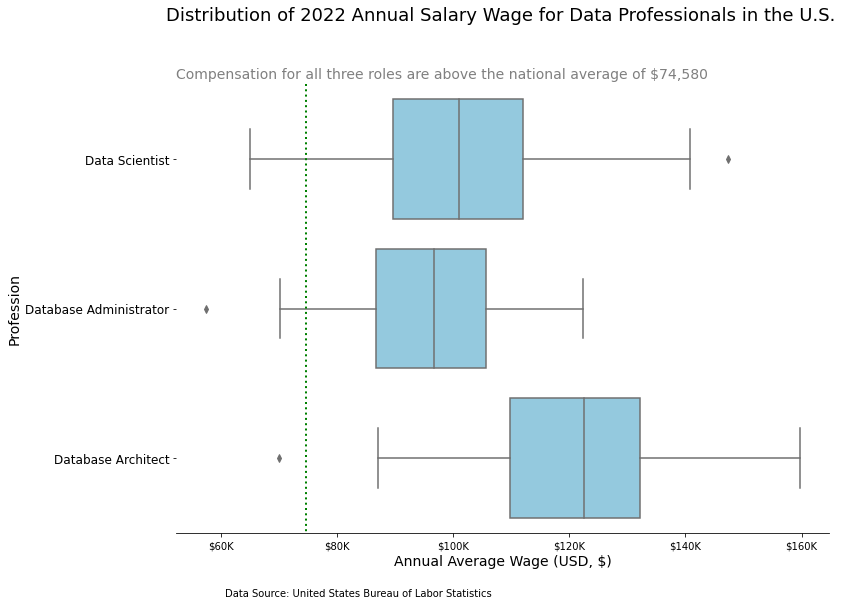

In [9]:
a4_dims = (11.7, 8.27)
fig1, ax1 = plt.subplots(figsize=a4_dims)

sns.despine(left=True)

box_plot = sns.boxplot(ax=ax1,
                       data=bls_df, 
                       x="Annual mean wage", 
                       y="Role", 
                       color='skyblue')


# single vline with specific ymin and ymax
plt.vlines(x=74580, ymin=-0.5, ymax=2.5, colors='green', ls=':', lw=2, label='vline_single - partial height')

#set main title
plt.suptitle(
    "Distribution of 2022 Annual Salary Wage for Data Professionals in the U.S.",  # Main title text
    fontsize=18,  # Set the font size
    color="black",  # Set the color
    x=0.51,  # Adjust this to align with the subtitle
    y=1.01,  # Adjust this to align with the subtitle
)

# Set the subtitle
plt.title(
    "Compensation for all three roles are above the national average of $74,580",  # Subtitle text
    fontsize=14,  # Set the font size
    color="grey",  # Set the color
    loc='left'
)


# Set axis labels
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s


ax1.xaxis.set_major_formatter(currency)
plt.xlabel("Annual Average Wage (USD, $)", fontsize=14)  # Set the x-axis label and fontsize
plt.xticks(fontsize=10)  # Set the font size of the x-axis ticks
plt.ylabel("Profession", fontsize=14)  # Set the y-axis label and fontsize
plt.yticks(fontsize=12)  # Set the font size of the y-axis ticks

#add data source text
text = fig1.text(0.50, 0.02,
                'Data Source: United States Bureau of Labor Statistics',
                horizontalalignment='right', 
                wrap=True )



#Adding median labels
medians = bls_df.groupby('Role')['Annual mean wage'].median()
vertical_offset = bls_df['Annual mean wage'].median() * 0.05 # offset from median for display

# for xtick in box_plot.get_xticks():
#     box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
#             horizontalalignment='center',size='x-small',color='w',weight='semibold')

plt.savefig("DS_DBA_DA_Dist.jpg", bbox_inches="tight")

plt.show()



In [10]:
# g = sns.FacetGrid(bls_df, col="Role")
# g.map(sns.histplot, "Annual mean wage")

# for ax in g.axes[0]:
#     ax.set_ylabel('Count')
#     # now you can obtain the axis from one of the axes
#     x_axis = ax.get_xaxis()
#     ax.xaxis.set_major_formatter(currency)

# plt.show()

C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


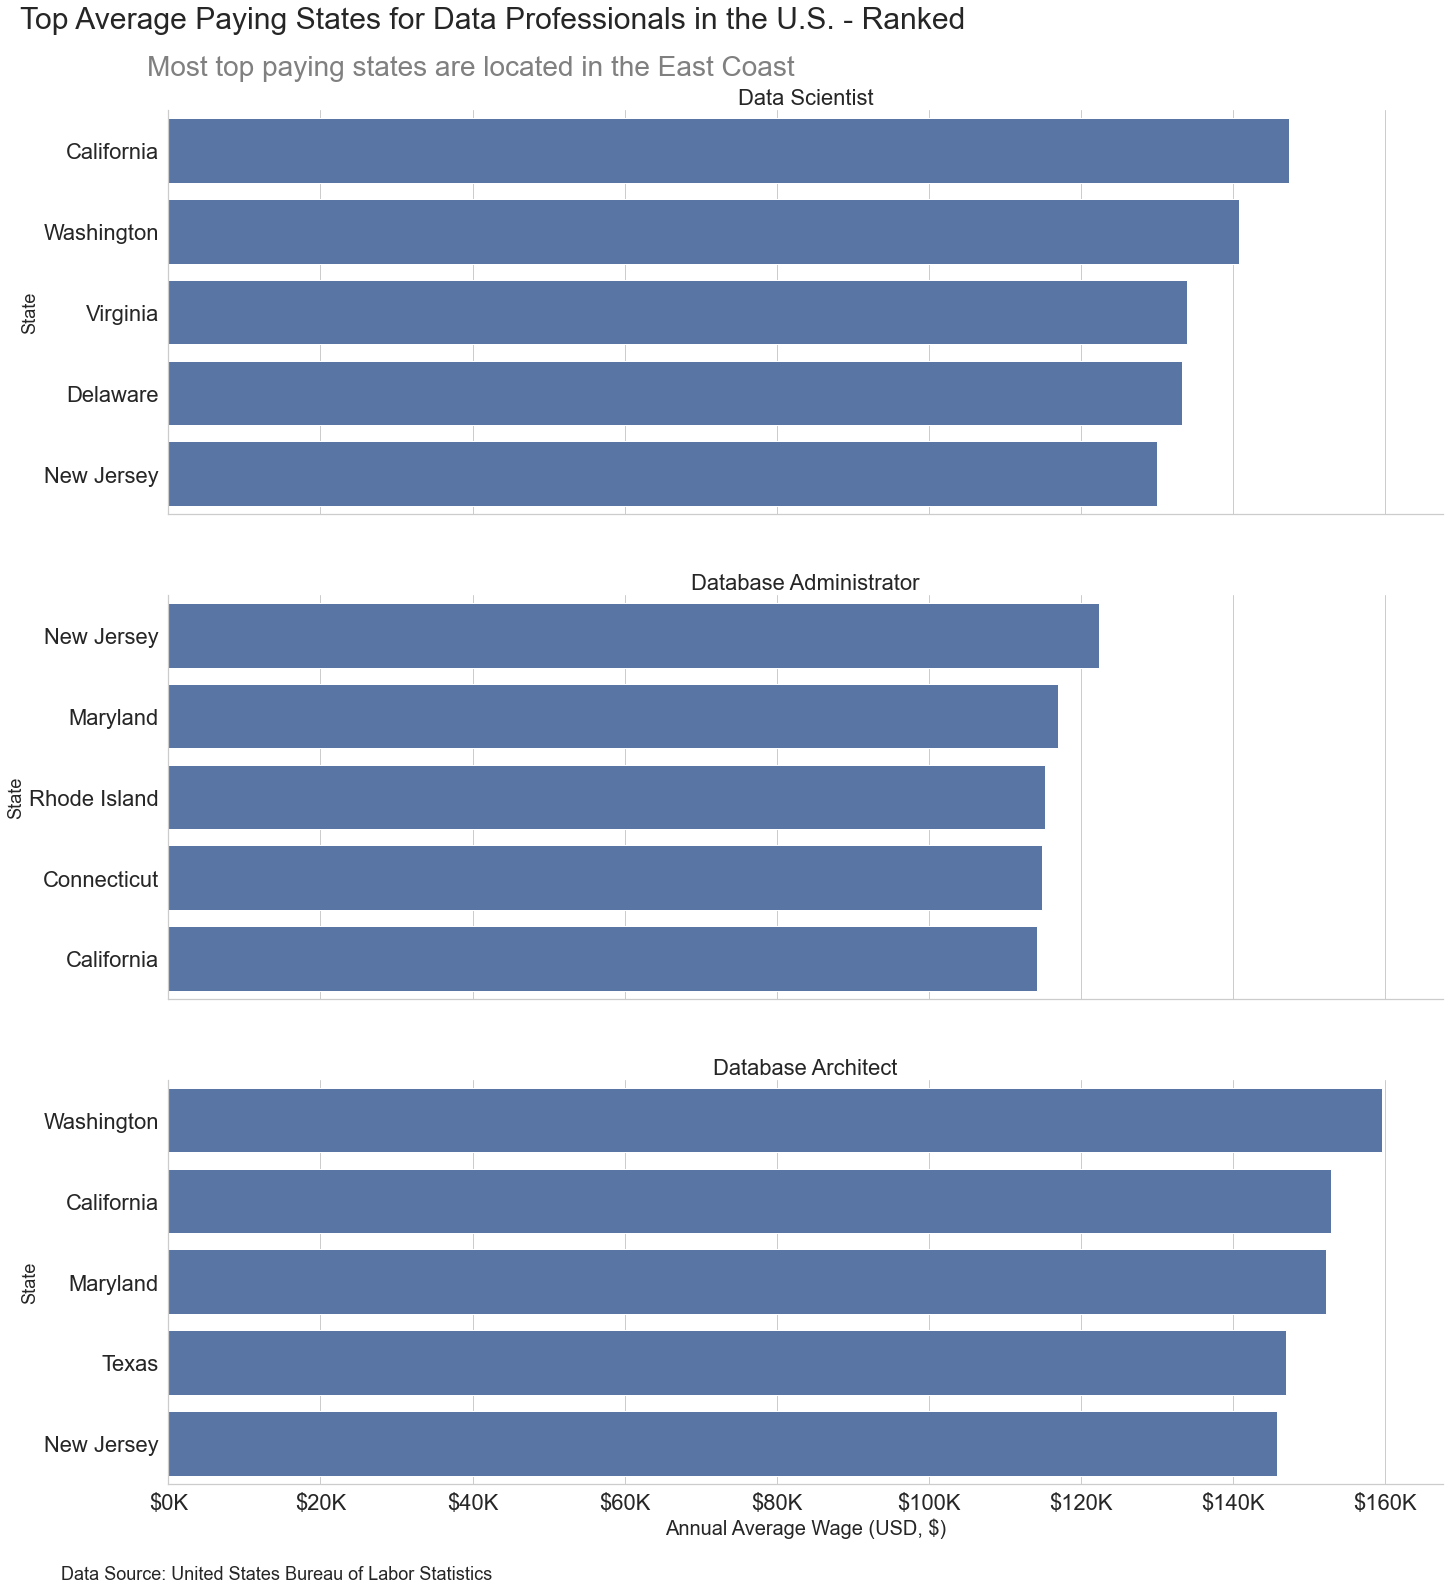

In [59]:
#Set theme style
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")


#Get top 10 state for each role
#N=10
# msk = bls_df.groupby('Role')['Annual mean wage'].rank(method='first', ascending=False) <= 10
# df1 = bls_df[msk]
#df1

#Initialize top N states
N=5

g = sns.FacetGrid(bls_df.groupby(['Role']).apply(lambda x: x.nlargest(N,['Annual mean wage'])).reset_index(drop=True), 
                  row="Role", 
                  sharey=False,
                  sharex=True,
                  height=8, 
                  aspect= 1.5,
                 despine=True, 
                  #col_wrap=2,
                  gridspec_kws={"wspace":0.4}
                 )

g.map(sns.barplot,"Annual mean wage", "State")

for ax in g.axes.flat:
    #y axis
    ax.set_ylabel('State', fontsize=18)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=22)
    #x axis
    ax.set_xlabel('Annual Average Wage (USD, $)', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=22)
    #major axis
    x_axis = ax.get_xaxis()
    ax.xaxis.set_major_formatter(currency)


#Formatting each facet title
g.axes.flat[0].set_title("Data Scientist", fontsize=22)
g.axes.flat[1].set_title("Database Administrator", fontsize=22)
g.axes.flat[2].set_title("Database Architect", fontsize=22)
    
    
    
#add title, subtitle and kicker
g.fig.subplots_adjust(top=0.92, 
                      right=1.6)

g.fig.suptitle('Top Average Paying States for Data Professionals in the U.S. - Ranked',
              fontsize=30)

g.fig.text(
    s="Most top paying states are located in the East Coast", 
    fontsize=28,  # Set the font size
    color="grey",  # Set the color
    x=0.1,
    y=0.94
)

text = g.fig.text(0.50, 0.07,
                'Data Source: United States Bureau of Labor Statistics',
                horizontalalignment='right', 
                wrap=True,
                 fontsize=18)

plt.savefig("DS_DBA_DA_top_5.jpg", bbox_inches="tight")
plt.show()

# Zip Recruiter Visualizations

In [12]:
zr_st.head(5)

,State,Data Scientist,Data Engineer,Data Analyst,Business Analyst
0,Alabama,103437,96843,69689,74375
1,Alaska,121680,141854,79092,89739
2,Arizona,122400,114596,82463,88010
3,Arkansas,96232,109017,62193,71249
4,California,143099,128004,75874,100388


In [13]:
zr_st_melted_df = pd.melt(zr_st, 
                  id_vars='State', 
                  value_vars=['Data Scientist', 'Data Engineer', 'Data Analyst', 'Business Analyst'],
                 var_name="Role",
                 value_name = "Average Salary")

zr_st_melted_df.head(5)

,State,Role,Average Salary
0,Alabama,Data Scientist,103437
1,Alaska,Data Scientist,121680
2,Arizona,Data Scientist,122400
3,Arkansas,Data Scientist,96232
4,California,Data Scientist,143099


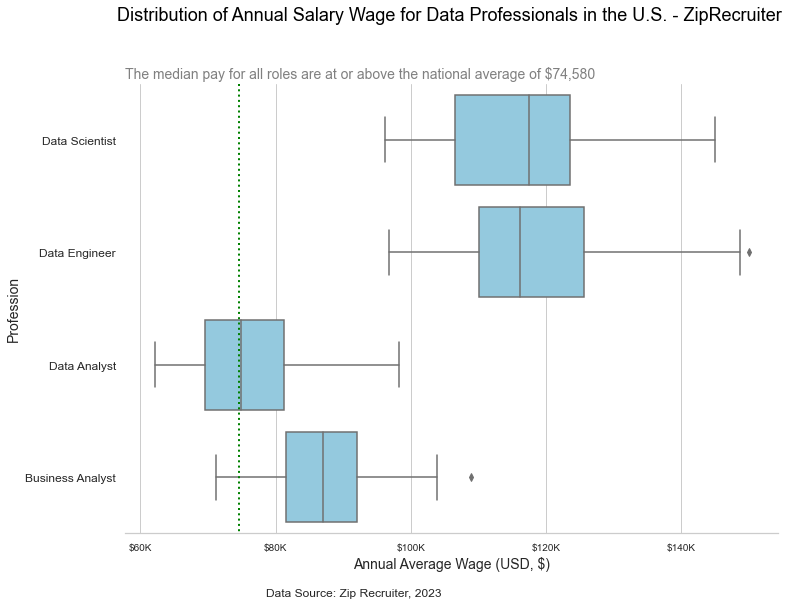

In [14]:
a4_dims = (11.7, 8.27)
fig2, ax2 = plt.subplots(figsize=a4_dims)

sns.despine(left=True)

box_plot = sns.boxplot(ax=ax2,
                       data= zr_st_melted_df, 
                       x="Average Salary", 
                       y="Role", 
                       color='skyblue')


# single vline with specific ymin and ymax
plt.vlines(x=74580, ymin=-0.5, ymax=3.5, colors='green', ls=':', lw=2, label='vline_single - partial height')

#set main title
plt.suptitle(
    "Distribution of Annual Salary Wage for Data Professionals in the U.S. - ZipRecruiter",  # Main title text
    fontsize=18,  # Set the font size
    color="black",  # Set the color
    x=0.51,  # Adjust this to align with the subtitle
    y=1.01,  # Adjust this to align with the subtitle
)

# Set the subtitle
plt.title(
    "The median pay for all roles are at or above the national average of $74,580",  # Subtitle text
    fontsize=14,  # Set the font size
    color="grey",  # Set the color
    loc='left'
)


# Set axis labels
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s


ax2.xaxis.set_major_formatter(currency)
plt.xlabel("Annual Average Wage (USD, $)", fontsize=14)  # Set the x-axis label and fontsize
plt.xticks(fontsize=10)  # Set the font size of the x-axis ticks
plt.ylabel("Profession", fontsize=14)  # Set the y-axis label and fontsize
plt.yticks(fontsize=12)  # Set the font size of the y-axis ticks

#add data source text
text = fig2.text(0.50, 0.02,
                'Data Source: Zip Recruiter, 2023',
                horizontalalignment='right', 
                wrap=True )

plt.savefig("DS_DE_DA_BA_Dist.jpg", bbox_inches="tight")

plt.show()

In [15]:
zr_st_melted_df.head(5)

,State,Role,Average Salary
0,Alabama,Data Scientist,103437
1,Alaska,Data Scientist,121680
2,Arizona,Data Scientist,122400
3,Arkansas,Data Scientist,96232
4,California,Data Scientist,143099


C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:472: UserWarning: `gridspec_kws` ignored when using `col_wrap`
  warnings.warn("`gridspec_kws` ignored when using `col_wrap`")
C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Lixander\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


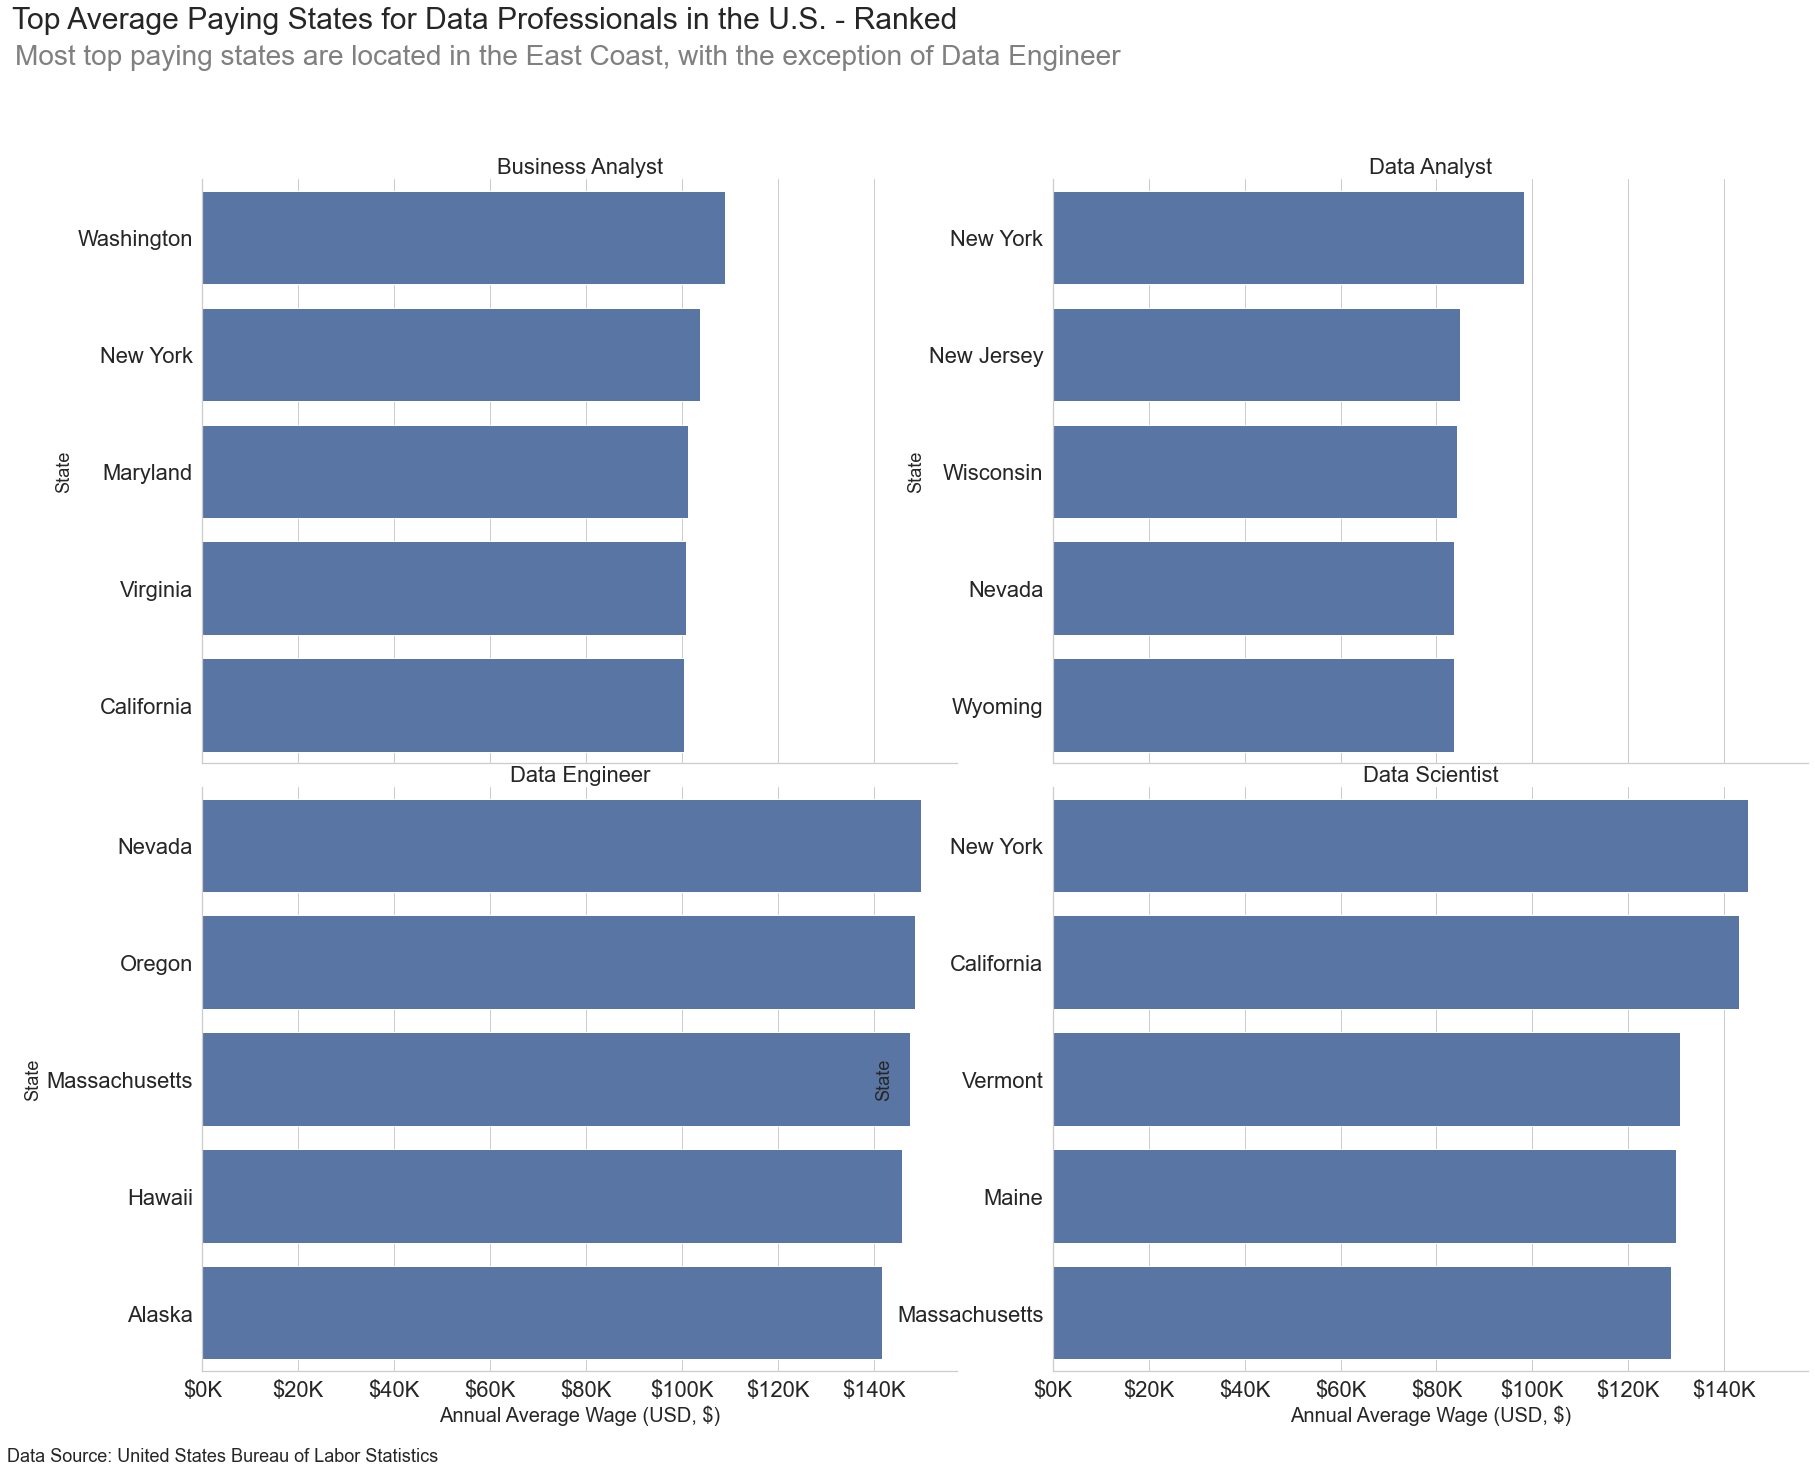

In [120]:
#Set plot theme
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

#Get top 10 state for each role
#N=10
# msk = bls_df.groupby('Role')['Annual mean wage'].rank(method='first', ascending=False) <= 10
# df1 = bls_df[msk]
#df1

#Initialize top N states
N=5

g = sns.FacetGrid(zr_st_melted_df.groupby(['Role']).apply(lambda x: x.nlargest(N,['Average Salary'])).reset_index(drop=True), 
                  col="Role", 
                  sharey=False,
                  sharex=True,
                  height=10, 
                  aspect= 1.2,
                 despine=True, 
                  col_wrap=2,
                  gridspec_kws={"hspace":0.1}
                 )

g.map(sns.barplot,"Average Salary", "State")

for ax in g.axes.flat:
    #y axis
    ax.set_ylabel('State', fontsize=18)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=22)
    #x axis
    ax.set_xlabel('Annual Average Wage (USD, $)', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=22)
    #major axis
    x_axis = ax.get_xaxis()
    ax.xaxis.set_major_formatter(currency)
    
#Formatting each facet title
g.axes.flat[0].set_title("Business Analyst", fontsize=22)
g.axes.flat[1].set_title("Data Analyst", fontsize=22)
g.axes.flat[2].set_title("Data Engineer", fontsize=22)
g.axes.flat[3].set_title("Data Scientist", fontsize=22)
    
    
    
# #add title, subtitle and kicker
g.fig.subplots_adjust(top=0.86, 
                      )

g.fig.suptitle('Top Average Paying States for Data Professionals in the U.S. - Ranked',
              fontsize=30,
              horizontalalignment='right')

g.fig.text(
    s="Most top paying states are located in the East Coast, with the exception of Data Engineer", 
    fontsize=28,  # Set the font size
    color="grey",  # Set the color
    x=-0.045,
    y=0.94
)

text = g.fig.text(0.2, -0.03,
                'Data Source: United States Bureau of Labor Statistics',
                horizontalalignment='right', 
                wrap=True,
                 fontsize=18)

plt.savefig("BA_DA_DE_DS_top_5.jpg", bbox_inches="tight")
plt.show()